In [94]:
# --------------------------------------------------
# TREC IS 2020 Evaluation Script
# Configured for 2020-B Events
# Used to evaluate TREC-IS runs
# --------------------------------------------------
version = 2.7 # Notebook Version Number
edition = "2020B"

import os
cwd = os.getcwd()

In [95]:
1

1

In [96]:
taskno = "1"#cwd.rpartition("/")[-1].partition(".")[0].replace("task", "")

tasktype = "crisis"
if taskno == "3":
    tasktype = "covid"

print("Task #:", taskno)
print("Task Type:", tasktype)

runFile = '../../../DATA/TREC-IS/Task-A-2021-data-processed/test.results.0.json'
print(runFile)
groundtruthFile = '../../../DATA/TREC-IS/Task-A-2021-data-processed/test.labels.json'
print(groundtruthFile)

Task #: 1
Task Type: crisis
../../../DATA/TREC-IS/Task-A-2021-data-processed/test.results.0.json
../../../DATA/TREC-IS/Task-A-2021-data-processed/test.labels.json


In [97]:
# Configuration Information

# Do we try and normalize the run priority scores?
enablePriorityNorm = True

# Score threshold
enableCategoryNorm = True
defaultScoreThreshold = 0.5

task1Categories = [
    "CallToAction-Donations",
    "CallToAction-MovePeople",
    "CallToAction-Volunteer",
    "Other-Advice",
    "Other-ContextualInformation",
    "Other-Discussion",
    "Other-Irrelevant",
    "Other-Sentiment",
    "Report-CleanUp",
    "Report-EmergingThreats",
    "Report-Factoid",
    "Report-FirstPartyObservation",
    "Report-Hashtags",
    "Report-Location",
    "Report-MultimediaShare",
    "Report-News",
    "Report-NewSubEvent",
    "Report-Official",
    "Report-OriginalEvent",
    "Report-ServiceAvailable",
    "Report-ThirdPartyObservation",
    "Report-Weather",
    "Request-GoodsServices",
    "Request-InformationWanted",
    "Request-SearchAndRescue",
]
task2Categories = [
    "CallToAction-MovePeople",
    "CallToAction-Volunteer",
    "Report-EmergingThreats",
    "Report-FirstPartyObservation",
    "Report-Location",
    "Report-MultimediaShare",
    "Report-NewSubEvent",
    "Report-ServiceAvailable",
    "Request-GoodsServices",
    "Request-InformationWanted",
    "Request-SearchAndRescue",
    "Other-Any",
]

taskcategories = task1Categories
if taskno == "2":
    taskcategories = task2Categories
    

# Task indices for task 2
taskCategoryIndex = [task1Categories.index(x) for x in task2Categories[:-1]]

# What we consider to be highly important categories of information
highImportCategories = [
    "Request-GoodsServices",
    "Request-SearchAndRescue",
    "CallToAction-MovePeople",
    "Report-EmergingThreats",
    "Report-NewSubEvent",
    "Report-ServiceAvailable"
]

highImportCategoriesShort = [
    "GoodsServices",
    "SearchAndRescue",
    "MovePeople",
    "EmergingThreats",
    "NewSubEvent",
    "ServiceAvailable"
]

skipEvents = [
    "portervilleLibraryFire2020"
]

# Priority map
priorityScoreMap = {
    "Critical": 1.0,
    "High": 0.75,
    "Medium": 0.5,
    "Low": 0.25,
}

# Parameters
var_lambda = 0.75 # weight to place on actionable information categories in comparison to non actionable categoriee
var_alpha = 0.3 # Flat gain for providing a correct alert, regardless of the categories selected


In [98]:
runName = 'Test'

print("Run Name:", runName)

Run Name: Test


In [99]:
import glob
task = "task" + taskno
# # The location of the ground truth data against which to compare the run
# classificationLabelFiles = [
#     "TRECIS-"+edition+"-"+tasktype+".labels.json",
# ]

# # The location of the ontology file
# ontologyFile = "TRECIS-"+edition+"-ITypes-Task"+taskno+".json"

# # The location of the topics file
# topicsFile = "TREC-IS-"+edition+"-Task"+taskno+".topics"

# Do we try and normalize the run priority scores?
enablePriorityNorm = False

# The location of the topics file
topicsFile = None

# The location of the ground truth data against which to compare the run
classificationLabelFiles = []
if tasktype == "covid":
    classificationLabelFiles = glob.glob("TRECIS-2020B-covid.labels.json")
    topicsFile = "TRECIS-2020B-covid.topics"
else:
    classificationLabelFiles = glob.glob("TRECIS-2020B-crisis.labels.json")
    #topicsFile = "TRECIS-2020B.topics"
    topicsFile = "TRECIS-2018-2020B.topics"

# The location of the ontology file
#ontologyFile = "TRECIS-2020B-ITypes-Task%s.json" % taskno
ontologyFile = 'ITR-H.types.v3.json'
ontologyFile

'ITR-H.types.v3.json'

In [100]:
topicArray = []

def change_num(x):
    if x in ['53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', 
                 '69', '70', '71', '72', '73', '74', '75']: # Some json files are incorrect 53 --> TRECIS-CTIT-H-053
        x = 'TRECIS-CTIT-H-0' + x
    x = x.replace('-Training', '') # We remove the "Training" because in the labels file there are only training instances
    # We filter them considering the labels file
    x = x.replace('-Test', '')
    return x

with open(topicsFile, "r") as inTopicsFile:
    
    topicNum = None
    topicDataset = None
    
    for line_ in inTopicsFile:
        line = line_.strip()
        
        if line == "</top>":
            if topicDataset in skipEvents:
                continue
            
            # Keep only the ones in test
            number = int(topicNum.split('-')[-1])
            if number >= 60:
                topicArray.append((topicDataset, topicNum))
            
        if line.startswith("<num>"):
            topicNum = change_num(line.partition("<num>")[2].partition("</num>")[0])
            
            
        if line.startswith("<dataset>"):
            topicDataset = line.partition("<dataset>")[2].partition("</dataset>")[0]
        
        
for row in topicArray:
    print(row)

('stormJorge2020', 'TRECIS-CTIT-H-060')
('tennesseeTornadoOutbreak2020', 'TRECIS-CTIT-H-061')
('tennesseeDerecho2020', 'TRECIS-CTIT-H-062')
('edenvilleDamFailure2020', 'TRECIS-CTIT-H-063')
('sanFranciscoPierFire2020', 'TRECIS-CTIT-H-064')
('tropicalStormCristobal2020', 'TRECIS-CTIT-H-065')
('beirutExplosion2020', 'TRECIS-CTIT-H-066')
('covidMiami2020', 'TRECIS-CTIT-H-067')
('covidJacksonville2020', 'TRECIS-CTIT-H-068')
('covidHouston2020', 'TRECIS-CTIT-H-069')
('covidPhoenix2020', 'TRECIS-CTIT-H-070')
('covidAtlanta2020', 'TRECIS-CTIT-H-071')
('covidNYC2020.pt2', 'TRECIS-CTIT-H-072')
('covidSeattle2020', 'TRECIS-CTIT-H-073')
('covidMelbourne2020', 'TRECIS-CTIT-H-074')
('covidNewZealand2020', 'TRECIS-CTIT-H-075')


In [101]:
# --------------------------------------------------
# Static data for the 2020 edition
# --------------------------------------------------
# Identifiers for the test events
eventidTopicidMap = dict(topicArray)
#eventIdentifiers = list(eventidTopicidMap.keys()) #modified
eventIdentifiers = list(eventidTopicidMap.values())

resultsFile = open(runName+".results."+edition+".task"+taskno+".overall.txt","w+")
resultsFile.write("TREC-IS "+edition+" Task "+taskno+" Notebook Evaluator v"+str(version)+"\n")
resultsFile.write("Run: "+runName+" ("+runFile+")"+"\n")
resultsFile.write(""+"\n")

perTopicFile = open(runName+".results."+edition+".task"+taskno+".pertopic.txt","w+")
perTopicFile.write("TREC-IS "+edition+" Task "+taskno+" Notebook Evaluator v"+str(version)+"\n")
perTopicFile.write("Run: "+runName+" ("+runFile+")"+"\n")
perTopicFile.write(""+"\n")

perEventFile = open(runName+".results."+edition+".task"+taskno+".perevent.txt","w+")
perEventFile.write("TREC-IS "+edition+" Task "+taskno+" Notebook Evaluator v"+str(version)+"\n")
perEventFile.write("Run: "+runName+" ("+runFile+")"+"\n")
perEventFile.write(""+"\n")

1

In [102]:
# --------------------------------------------------
# Processing Starts Here
# --------------------------------------------------
import json
import gzip
import math
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

# --------------------------------------------------
# Stage 1: Load the ground truth dataset 
# --------------------------------------------------


In [103]:

# --------------------------------------------------
# Stage 2: Load run file 
# --------------------------------------------------



In [104]:
import json
# --------------------------------------------------
# Stage 3: Load the categories 
# --------------------------------------------------
with open(ontologyFile, encoding='utf-8') as ontologyJSONFile:    
    ontologyJSON = json.load(ontologyJSONFile)

informationTypes2Index = {} # category -> numerical index
informationTypesShort2Index = {} # category short form (e.g. Report-EmergingThreats vs. EmergingThreats) -> numerical index

for informationTypeJSON in ontologyJSON["informationTypes"]:
    informationTypeId = informationTypeJSON["id"]
    
    # Skip the "Other-Any" type, as we don't care about this collection label
    # Also skip the MovePeople label, as assessors have not identified any data of this type
    if taskno != "1" and informationTypeId in ["Other-Any"]:
        continue
    
    informationTypeIndex = taskcategories.index(informationTypeId)
    informationTypes2Index[informationTypeId] = informationTypeIndex
    informationTypesShort2Index[informationTypeId.split("-")[1]] = informationTypeIndex

In [105]:
informationTypes2Index

{'Request-GoodsServices': 22,
 'Request-SearchAndRescue': 24,
 'Request-InformationWanted': 23,
 'CallToAction-Volunteer': 2,
 'CallToAction-Donations': 0,
 'CallToAction-MovePeople': 1,
 'Report-FirstPartyObservation': 11,
 'Report-ThirdPartyObservation': 20,
 'Report-Weather': 21,
 'Report-EmergingThreats': 9,
 'Report-NewSubEvent': 16,
 'Report-MultimediaShare': 14,
 'Report-ServiceAvailable': 19,
 'Report-Factoid': 10,
 'Report-Official': 17,
 'Report-News': 15,
 'Report-CleanUp': 8,
 'Report-Hashtags': 12,
 'Report-OriginalEvent': 18,
 'Other-ContextualInformation': 4,
 'Other-Advice': 3,
 'Other-Sentiment': 7,
 'Other-Discussion': 5,
 'Other-Irrelevant': 6}

In [106]:
informationTypesShort2Index

{'GoodsServices': 22,
 'SearchAndRescue': 24,
 'InformationWanted': 23,
 'Volunteer': 2,
 'Donations': 0,
 'MovePeople': 1,
 'FirstPartyObservation': 11,
 'ThirdPartyObservation': 20,
 'Weather': 21,
 'EmergingThreats': 9,
 'NewSubEvent': 16,
 'MultimediaShare': 14,
 'ServiceAvailable': 19,
 'Factoid': 10,
 'Official': 17,
 'News': 15,
 'CleanUp': 8,
 'Hashtags': 12,
 'OriginalEvent': 18,
 'ContextualInformation': 4,
 'Advice': 3,
 'Sentiment': 7,
 'Discussion': 5,
 'Irrelevant': 6}

In [107]:
eventIdentifiers

['TRECIS-CTIT-H-060',
 'TRECIS-CTIT-H-061',
 'TRECIS-CTIT-H-062',
 'TRECIS-CTIT-H-063',
 'TRECIS-CTIT-H-064',
 'TRECIS-CTIT-H-065',
 'TRECIS-CTIT-H-066',
 'TRECIS-CTIT-H-067',
 'TRECIS-CTIT-H-068',
 'TRECIS-CTIT-H-069',
 'TRECIS-CTIT-H-070',
 'TRECIS-CTIT-H-071',
 'TRECIS-CTIT-H-072',
 'TRECIS-CTIT-H-073',
 'TRECIS-CTIT-H-074',
 'TRECIS-CTIT-H-075']

In [108]:
# -----------------------------------------------------------
# Stage 4: Produce ground truth maps between tweetIds and categories
# -----------------------------------------------------------
# Notes: Ground truth is used as a base, if a run includes tweets
#        not in the ground truth they will be ignored
# Assumptions: A tweet will not be returned for multiple events

tweetId2TRECInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECHighImportInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECLowImportInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECPriorityCategory = {} # tweet id -> priority label (Critical,High,Medium,Low)
index2TweetId = {} # ordered tweets
event2tweetIds = {} # event -> tweet ids for tweets within that event
countHighCriticalImport = 0
countLowMediumImport = 0
tweetsSeen = []


invertedPriorityScoreMap = {
    v:k for k,v in priorityScoreMap.items()
}

groundtruthJSON = []
print("Reading ", groundtruthFile)
with open(groundtruthFile, encoding='iso-8859-1') as groundtruthJSONFile:    
    groundtruthJSON = json.load(groundtruthJSONFile)

print(len(groundtruthJSON))
tweetIndex = 0

#for groundtruth in groundtruthJSON:
idx = 0
for eventJSON in groundtruthJSON:#["events"]:
    
    eventid = eventJSON["eventID"]
    #print(eventid)

    if eventid in skipEvents:
        print(eventid, 'in skipEvents')
        continue

    if not event2tweetIds.get(eventid):
        event2tweetIds[eventid] = []

    if any(eventid in s for s in eventIdentifiers):
        # iterate over tweets in the event
        #for tweetJSON in eventJSON["tweets"]:
        
        tweetJSON = eventJSON
        tweetid = tweetJSON["postID"]
        categories = tweetJSON["postCategories"]
        priority = tweetJSON["postPriority"]

        if priority == "High" or priority == "Critical":
            countHighCriticalImport = countHighCriticalImport + 1

        if priority == "Low" or priority == "Medium":
            countLowMediumImport = countLowMediumImport + 1

        # check categories for name issues and correct if possible
        cleanedCategories = []
        highImportCats = []
        lowImportCats = []
        for categoryId in categories:
            if not any(categoryId in s for s in informationTypesShort2Index.keys()):
                print("Found unknown category in ground truth "+categoryId+", ignoring...")
                pass
            else:
                cleanedCategories.append(categoryId)
                if any(categoryId in s for s in highImportCategoriesShort):
                    highImportCats.append(categoryId)
                else:
                    lowImportCats.append(categoryId)

        if tweetid not in tweetsSeen:
            event2tweetIds[eventid].append(tweetid)
            tweetId2TRECInfoCategories[tweetid] = cleanedCategories
            tweetId2TRECHighImportInfoCategories[tweetid] = highImportCats
            tweetId2TRECLowImportInfoCategories[tweetid] = lowImportCats
            tweetId2TRECPriorityCategory[tweetid] = priority
            index2TweetId[tweetIndex] = tweetid;
            tweetIndex = tweetIndex + 1
            tweetsSeen.append(tweetid)
            

        else:
            tweetId2TRECInfoCategories[tweetid] = list(set(
                cleanedCategories + tweetId2TRECInfoCategories[tweetid]
            ))

            prePriorityScore = priorityScoreMap[tweetId2TRECPriorityCategory[tweetid]]
            thisPriorityScore = priorityScoreMap[priority]

            tweetId2TRECPriorityCategory[tweetid] = invertedPriorityScoreMap[
                max(prePriorityScore, thisPriorityScore)
            ]
            idx += 1


    else:
        print("WARN: Found ground truth data for event not in the topic set ", eventid, ", ignoring...")

event2tweetIds['TRECIS-CTIT-H-060'], event2tweetIds.keys(), len(event2tweetIds.keys()), len(tweetId2TRECInfoCategories), idx

Reading  ../../../DATA/TREC-IS/Task-A-2021-data-processed/test.labels.json
12922
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Foun

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category in ground truth Location, ignoring...
Found unknown category i

(['1231307896362807298',
  '1231569665043976192',
  '1232264304067477504',
  '1232070602778959872',
  '1232648900105965568',
  '1232296297480232960',
  '1231677953240698882',
  '1232339672245952512',
  '1231891782407016454',
  '1231889481948680192',
  '1232500754688233472',
  '1232593369282613249',
  '1231923990219952132',
  '1232503276840591360',
  '1231836799972102147',
  '1232649394069090306',
  '1232644597303644160',
  '1231901989770014721',
  '1232639930330951680',
  '1232060429742071809',
  '1231262673364553735',
  '1232332487977848832',
  '1231865118843121664',
  '1232644149498785793',
  '1231215524757020673',
  '1231260835034562560',
  '1232642528953978880',
  '1231879758587273216',
  '1231895295526567937',
  '1231487746209910784',
  '1231940329877667840',
  '1232643430691549190',
  '1232347251810480130',
  '1231798992415154177',
  '1231914114529792000',
  '1232386879632310272',
  '1231284515005440001',
  '1232271168406740993',
  '1232289314312249349',
  '1232076210747969536',


In [109]:
tweetId2TRECInfoCategories

{'1231307896362807298': ['Irrelevant'],
 '1231569665043976192': ['Irrelevant'],
 '1232264304067477504': ['Irrelevant'],
 '1232070602778959872': ['Irrelevant'],
 '1232648900105965568': ['Irrelevant'],
 '1232296297480232960': ['Irrelevant'],
 '1231677953240698882': ['Irrelevant'],
 '1232339672245952512': ['Irrelevant'],
 '1231891782407016454': ['Irrelevant'],
 '1231889481948680192': ['Irrelevant'],
 '1232500754688233472': ['Irrelevant'],
 '1232593369282613249': ['Irrelevant'],
 '1231923990219952132': ['Irrelevant'],
 '1232503276840591360': ['Irrelevant'],
 '1231836799972102147': ['Irrelevant'],
 '1232649394069090306': ['Irrelevant'],
 '1232644597303644160': ['Irrelevant'],
 '1231901989770014721': ['Irrelevant'],
 '1232639930330951680': ['Irrelevant'],
 '1232060429742071809': ['Irrelevant'],
 '1231262673364553735': ['Irrelevant'],
 '1232332487977848832': ['Irrelevant'],
 '1231865118843121664': ['Irrelevant'],
 '1232644149498785793': ['Irrelevant'],
 '1231215524757020673': ['Irrelevant'],


In [110]:
# -----------------------------------------------------------
# Stage 5: Produce run predicted maps between tweetIds and categories
# -----------------------------------------------------------
tweetId2RunInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunHighImportInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunLowImportInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunInfoCategoriesProb = {} # tweet id -> predicted category probability by participant system
tweetId2RunInfoCategoriesProbNorm = {} # tweet id -> predicted category probability by participant system
tweetId2RunPriorityScore = {} # tweet id -> importance score from participant system
tweetId2RunPriorityCategory = {} # tweet id -> importance category (Critical, High, Medium Low)
tweetId2RunPriorityScoreNorm = {} # tweet id -> importance score from participant system
event2TweetIdRank = {} # event -> (rank,tweetid)

maxPrediction = -999999
minPrediction = 999999
maxCategory = -999999
minCategory = 999999

print("Reading ", runFile)
with open(runFile, encoding='iso-8859-1') as f:    
    runContents = json.load(f)

print(len(runContents))

for runLine in runContents:
    
    #print(runLine)
    #for key in eventidTopicidMap:
    #      runLine = runLine.replace(key, eventidTopicidMap[key])  
    
    #predictionParts = runLine.strip().replace(", ", ",").replace("\",\" ", "\",\"").replace(" ","\t").replace("'","\"").split('\t')
    
    #if (len(predictionParts)<6):
    #    print(runLine)
    #    continue
    #else:
    eventId = runLine['topic']#predictionParts[0]

    if eventId in skipEvents:
        continue

    tweetId = str(runLine['tweet_id']) #predictionParts[2]
    #rank = float(predictionParts[3])
    #print(predictionParts[5])
    categories = runLine['info_type_labels']#json.loads(predictionParts[5])

    if taskno == "2" and ( len(categories) > len(task2Categories) ):
        categories_ = [categories[i] for i in taskCategoryIndex]
        categories_ = categories_ + [0.0]
        categories = categories_

    priority = float(runLine['priority'])#predictionParts[4])

    if priority > maxPrediction:
        maxPrediction = priority
    if priority < minPrediction:
        minPrediction = priority

    cleanedCategories = []
    cleanedCategoriesProbs = []
    highImportCats = []
    lowImportCats = []
    catIndex = 0

    for categoryProbability in categories:

        if categoryProbability > maxCategory:
            maxCategory = categoryProbability
        if categoryProbability < minCategory:
            minCategory = categoryProbability

        cleanedCategoriesProbs.append(categoryProbability)

        if categoryProbability < defaultScoreThreshold:
            catIndex = catIndex + 1
            continue

        categoryId = taskcategories[catIndex]
        catIndex = catIndex + 1

        if not any(categoryId in s for s in informationTypes2Index.keys()):
            print("Found unknown category in run ", categoryId, "ignoring...")
        else:
            cleanedCategories.append(categoryId)
            if any(categoryId in s for s in highImportCategories):
                highImportCats.append(categoryId)
            else:
                lowImportCats.append(categoryId)

    tweetId2RunHighImportInfoCategories[tweetId] = highImportCats
    tweetId2RunLowImportInfoCategories[tweetId] = lowImportCats
    tweetId2RunInfoCategories[tweetId] = cleanedCategories
    tweetId2RunInfoCategoriesProb[tweetId] = cleanedCategoriesProbs
    tweetId2RunPriorityScore[tweetId] = priority

    if priority > priorityScoreMap["High"]:
        tweetId2RunPriorityCategory[tweetId] = "Critical"
    elif priority > priorityScoreMap["Medium"]:
        tweetId2RunPriorityCategory[tweetId] = "High"
    elif priority > priorityScoreMap["Low"]:
        tweetId2RunPriorityCategory[tweetId] = "Medium"
    else:
        tweetId2RunPriorityCategory[tweetId] = "Low"

    #if not event2TweetIdRank.get(eventId):
    #    event2TweetIdRank[eventId] = []
    #rankTuple = (tweetId, rank)
    #event2TweetIdRank.get(eventId).append(rankTuple)


#for eventId in event2TweetIdRank.keys():
#    tweetsSorted = sorted(event2TweetIdRank.get(eventId), key=lambda tup: tup[1])
#    event2TweetIdRank[eventId] = tweetsSorted
    
for i in range(len(index2TweetId)):
    tweetId = index2TweetId[i]
    if tweetId2RunPriorityScore.get(tweetId):
        
        if enablePriorityNorm:
            if (minPrediction-minPrediction) == 0.0:
                tweetId2RunPriorityScoreNorm[tweetId] = 0.0
            else:
                tweetId2RunPriorityScoreNorm[tweetId] = (tweetId2RunPriorityScore.get(tweetId)-minPrediction)/(maxPrediction-minPrediction)
        else:
            tweetId2RunPriorityScoreNorm[tweetId] = tweetId2RunPriorityScore.get(tweetId)
    else:
        tweetId2RunPriorityScoreNorm[tweetId] = 0.0

for i in range(len(index2TweetId)):
    tweetId = index2TweetId[i]
    if tweetId2RunInfoCategoriesProb.get(tweetId):
        
        probVector = tweetId2RunInfoCategoriesProb.get(tweetId)
        catVector = []
        catHighVector = []
        catLowVector = []
        
        for j in range(len(informationTypes2Index.keys())):
            prob = probVector[j]
            
            if enableCategoryNorm:
                if (maxCategory-minCategory) == 0.0:
                    probVector[j] = 0.0
                else:
                    probVector[j] = (prob-minCategory)/(maxCategory-minCategory)
                    if probVector[j] >= defaultScoreThreshold:
                        catVector.append(taskcategories[j])
                        if any(taskcategories[j] in s for s in highImportCategories):
                            catHighVector.append(taskcategories[j])
                        else:
                            catLowVector.append(taskcategories[j])
            else:
                probVector[j] = prob
                
        tweetId2RunInfoCategoriesProbNorm[tweetId] = probVector
        tweetId2RunInfoCategories[tweetId] = catVector
        tweetId2RunHighImportInfoCategories[tweetId] = catHighVector
        tweetId2RunLowImportInfoCategories[tweetId] = catLowVector
    else:
        probVector = []
        for j in range(len(informationTypes2Index.keys())):
            
            probVector[j].append(0.0)
            
        tweetId2RunInfoCategoriesProbNorm[tweetId] = probVector

tweetId2RunInfoCategories['1231149535503798272']

Reading  ../../../DATA/TREC-IS/Task-A-2021-data-processed/test.results.0.json
12922
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring...
Found unknown category in run  Report-Location ignoring.

['Other-Irrelevant']

In [111]:
informationTypes2Index

{'Request-GoodsServices': 22,
 'Request-SearchAndRescue': 24,
 'Request-InformationWanted': 23,
 'CallToAction-Volunteer': 2,
 'CallToAction-Donations': 0,
 'CallToAction-MovePeople': 1,
 'Report-FirstPartyObservation': 11,
 'Report-ThirdPartyObservation': 20,
 'Report-Weather': 21,
 'Report-EmergingThreats': 9,
 'Report-NewSubEvent': 16,
 'Report-MultimediaShare': 14,
 'Report-ServiceAvailable': 19,
 'Report-Factoid': 10,
 'Report-Official': 17,
 'Report-News': 15,
 'Report-CleanUp': 8,
 'Report-Hashtags': 12,
 'Report-OriginalEvent': 18,
 'Other-ContextualInformation': 4,
 'Other-Advice': 3,
 'Other-Sentiment': 7,
 'Other-Discussion': 5,
 'Other-Irrelevant': 6}

In [112]:
# --------------------------------------------------
# Stage 6: Create ground truth vectors per category
# --------------------------------------------------

category2GroundTruth = {} # category -> tweet vector with binary 1 vs all ground truth category labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        #pprint(categories)
        if any(categoryIdShort in s for s in categories):
            categoryVector.append(1)
        else:
            categoryVector.append(0)
    category2GroundTruth[categoryId] = categoryVector
            
#pprint(category2GroundTruth)

In [113]:
# --------------------------------------------------
# Stage 7: Create run vectors per category 
# --------------------------------------------------
# Assumptions: If run misses a tweet, we assume it has
#              no categories
category2Predicted = {} # category -> tweet vector with binary 1 vs all predicted by system labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        
        if tweetId2RunInfoCategories.get(tweetId):
            categories = tweetId2RunInfoCategories.get(tweetId)
            if any(categoryIdShort in s for s in categories):
                categoryVector.append(1)
            else:
                categoryVector.append(0)
        else:
            categoryVector.append(0)

    category2Predicted[categoryId] = categoryVector

#pprint(index2TweetId)

In [114]:
# --------------------------------------------------
# Stage 8: Make event category vectors 
# --------------------------------------------------

event2groundtruth = {} # event -> category -> tweet vector with binary 1 vs all ground truth category labels
for eventId in eventIdentifiers:
    eventCategories = {}
    for categoryId in informationTypes2Index.keys():
        categoryIdShort = categoryId.split("-")[1]
        categoryVector = []
        
        if eventId in event2tweetIds:
            for tweetId in event2tweetIds.get(eventId):
                #print(tweetId)
                categories = tweetId2TRECInfoCategories.get(tweetId)
                if any(categoryIdShort in s for s in categories):
                    categoryVector.append(1)
                else:
                    categoryVector.append(0)
        else:
            print(eventId)
        eventCategories[categoryId] = categoryVector
    event2groundtruth[eventId] = eventCategories
    

event2prediction = {} # event -> category -> tweet vector with binary 1 vs all predicted by system labels
for eventId in eventIdentifiers:
    eventCategories = {}
    for categoryId in informationTypes2Index.keys():
        categoryIdShort = categoryId.split("-")[1]
        categoryVector = []
        if eventId in event2tweetIds:
            for tweetId in event2tweetIds.get(eventId):
                #print(tweetId)
                categories = tweetId2RunInfoCategories.get(tweetId)

                if categories == None:
                    categories = json.loads("[]")
                    tweetId2RunInfoCategories[tweetId] = categories

                if any(categoryId in s for s in categories):
                    categoryVector.append(1)
                else:
                    categoryVector.append(0)
        else:
            print(eventId)

        eventCategories[categoryId] = categoryVector
    event2prediction[eventId] = eventCategories

TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-072
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTIT-H-067
TRECIS-CTI

In [115]:
# -----------------------------------------------------------
# Stage 9: Make priority classification vectors
# -----------------------------------------------------------

category2GroundTruthPriority = {} # category -> tweet vector with binary 1 vs all ground truth priority labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    priorityVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        if any(categoryIdShort in s for s in categories):
            priority = tweetId2TRECPriorityCategory.get(tweetId)
            priorityVector.append(priority)
    category2GroundTruthPriority[categoryId] = priorityVector

category2PredictedPriority = {} # category -> tweet vector with binary 1 vs all predicted by system labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        if any(categoryIdShort in s for s in categories):
            if tweetId2RunPriorityCategory.get(tweetId):
                priority = tweetId2RunPriorityCategory.get(tweetId)
            
                categoryVector.append(priority)
            else:
                categoryVector.append("Low") # default to low priority

    category2PredictedPriority[categoryId] = categoryVector
        


In [116]:
# --------------------------------------------------
# Disable Warnings (comment this out when debugging!)
# --------------------------------------------------
import warnings
# warnings.filterwarnings("ignore") # ignore warnings about 0-score categories

In [117]:
# --------------------------------------------------
# TREC-IS 2020-B
# Priority-Centric Discounted Cumulative Gain
# --------------------------------------------------

import pandas as pd

def calc_dcg(scores, at_k=100):
    position = 1
    accumulator = 0.0
    for score in scores[:at_k]:

        numerator = 2 ** score - 1
        denom = np.log2(position + 1)

        accumulator += numerator / denom
        position += 1

    return accumulator

priority_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4,
}

at_k = 100

tweetId2TRECPriorityCategory_score = {
    k:priority_map[v] for k,v in tweetId2TRECPriorityCategory.items()
}
tweetId2TRECPriorityCategory_scores_sorted = sorted(
    tweetId2TRECPriorityCategory_score.values(),
    reverse=True
)

best_dcg_per_event = {}
for event, rel_tweets in event2tweetIds.items():
    print(event)
    
    tweetId2TRECPriorityCategory_scores_sorted = sorted(
        [tweetId2TRECPriorityCategory_score[x] for x in rel_tweets],
        reverse=True
    )
    ideal_dcg = calc_dcg(tweetId2TRECPriorityCategory_scores_sorted, at_k)
    print("\tBest DCG:", ideal_dcg)
    best_dcg_per_event[event] = ideal_dcg
    
print("Mean:", np.mean(list(best_dcg_per_event.values())))
print()

# Code below calculates the DCG for a system's 
#  ranked priority tweets. We have to do some 
#  sampling here to break ties among tweets with
#  the same priority scores.

# Build a dataframe from the system's provided
#  priority scores, so we can identify what the
#  top-most priorities are and get a count of
#  the number of tweets in each priority bin.
priority_df = pd.DataFrame(
    [(k, priority_map[v]) for k, v in tweetId2RunPriorityCategory.items()],
    columns=["tweet_id", "priority"]
)

# Build metrics for each event
system_dcg_per_event = {}
for event, rel_tweets in event2tweetIds.items():
    print("Event:", event)
    local_priority_df = priority_df[priority_df["tweet_id"].isin(set(rel_tweets))]
    
    unique_scores = local_priority_df["priority"].value_counts()
    
    # Find the top priority scores that would be included
    #  in the necessary at_k values.
    total = 0
    top_keys = []
    candidates = {}
    for top in sorted(unique_scores.index, reverse=True):

        # We store this key, so we can go back and shuffle
        #. tweets with this score.
        top_keys.append(top)
        local_restricted_df = local_priority_df[local_priority_df["priority"] == top]
        candidates[top] = list(local_restricted_df["tweet_id"])

        total += local_restricted_df.shape[0]

        # Once we have enough samples, stop.
        if ( total > at_k ):
            break

    # Now we generate distribution over the DCG for this
    #  system and do this a number of times to remove
    #  dependence on our selection of the top k tweets
    random_dcgs = []
    for i in range(100):

        local_tweet_ids = []
        for top in top_keys:
            this_top_tweets = candidates[top][:]
            np.random.shuffle(this_top_tweets)

            needed = at_k - len(local_tweet_ids)
            local_tweet_ids.extend(this_top_tweets[:needed])

        local_scores = [tweetId2TRECPriorityCategory_score[x] for x in local_tweet_ids]

        random_dcgs.append(calc_dcg(local_scores))

    system_dcg = np.mean(random_dcgs)

    system_ndcg_ = system_dcg / best_dcg_per_event[event]
    print("\tnDCG:", system_ndcg_)
    system_dcg_per_event[event] = system_ndcg_
    
print()
system_ndcg_micro = np.mean(list(system_dcg_per_event.values()))
print("System Event-Micro nDCG:", system_ndcg_micro)

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: nDCG and Priority"+"\n")
resultsFile.write("Overall performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> nDCG:"+"\t"+str(system_ndcg_micro)+"\n")
resultsFile.write(""+"\n")

TRECIS-CTIT-H-060
	Best DCG: 20.93867087428094
TRECIS-CTIT-H-062
	Best DCG: 213.30729994421722
TRECIS-CTIT-H-069
	Best DCG: 175.67469323453255
TRECIS-CTIT-H-065
	Best DCG: 180.6066522141302
TRECIS-CTIT-H-073
	Best DCG: 40.346033329449185
TRECIS-CTIT-H-063
	Best DCG: 304.393011788972
TRECIS-CTIT-H-070
	Best DCG: 159.61813414853816
TRECIS-CTIT-H-066
	Best DCG: 138.6888838285704
TRECIS-CTIT-H-068
	Best DCG: 66.23928684513234
TRECIS-CTIT-H-071
	Best DCG: 115.80697740483258
TRECIS-CTIT-H-064
	Best DCG: 40.15401190196709
TRECIS-CTIT-H-061
	Best DCG: 86.62987068726869
TRECIS-CTIT-H-075
	Best DCG: 100.26233679020632
TRECIS-CTIT-H-074
	Best DCG: 39.467695286563114
Mean: 120.15239701990434

Event: TRECIS-CTIT-H-060
	nDCG: 1.0
Event: TRECIS-CTIT-H-062
	nDCG: 0.541760275451353
Event: TRECIS-CTIT-H-069
	nDCG: 0.46652809592850414
Event: TRECIS-CTIT-H-065
	nDCG: 0.3701779446002682
Event: TRECIS-CTIT-H-073
	nDCG: 0.5609750103801743
Event: TRECIS-CTIT-H-063
	nDCG: 0.4243149723274979
Event: TRECIS-CTIT-

1

In [118]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Type Categorization
# Overall performance
# --------------------------------------------------
# Average performance over information types
# Macro averaged (information types have equal weight)
# Does not average across events (larger events have more impact)
# Positive class is the target class
# Precision, recall and F1 only consider the positive class
# Accuracy is an overall metric
# We report performance for all categories, high importance categories and low importance categories

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

avgPrecision = 0.0
avgRecall = 0.0
avgF1 = 0.0
avgAccuracy = 0.0

avgPrecisionHigh = 0.0
avgRecallHigh = 0.0
avgF1High = 0.0
avgAccuracyHigh = 0.0

avgPrecisionLow = 0.0
avgRecallLow = 0.0
avgF1Low = 0.0
avgAccuracyLow = 0.0

for categoryId in informationTypes2Index.keys():
    categoryPrecision = precision_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryRecall = recall_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryF1 = f1_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryAccuracy = accuracy_score(category2GroundTruth[categoryId], category2Predicted[categoryId])
    
    avgPrecision = avgPrecision + categoryPrecision
    avgRecall = avgRecall + categoryRecall
    avgF1 = avgF1 + categoryF1
    avgAccuracy = avgAccuracy + categoryAccuracy
    
    if any(categoryId in s for s in highImportCategories):
        avgPrecisionHigh = avgPrecisionHigh + categoryPrecision
        avgRecallHigh = avgRecallHigh + categoryRecall
        avgF1High = avgF1High + categoryF1
        avgAccuracyHigh = avgAccuracyHigh + categoryAccuracy
    else:
        avgPrecisionLow = avgPrecisionLow + categoryPrecision
        avgRecallLow = avgRecallLow + categoryRecall
        avgF1Low = avgF1Low + categoryF1
        avgAccuracyLow = avgAccuracyLow + categoryAccuracy

numInformationTypes = len(informationTypes2Index)
numHighInformationTypes = len(highImportCategories)
numLowInformationTypes = numInformationTypes - numHighInformationTypes
        
print("Information Type Precision (positive class, multi-type, macro): "+str(avgPrecision/numInformationTypes))
print("Information Type Recall (positive class, multi-type, macro): "+str(avgRecall/numInformationTypes))
print("Information Type F1 (positive class, multi-type, macro): "+str(avgF1/numInformationTypes))
print("Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracy/numInformationTypes))

print("High Importance Information Type Precision (positive class, multi-type, macro): "+str(avgPrecisionHigh/numHighInformationTypes))
print("High Importance Information Type Recall (positive class, multi-type, macro): "+str(avgRecallHigh/numHighInformationTypes))
print("High Importance Information Type F1 (positive class, multi-type, macro): "+str(avgF1High/numHighInformationTypes))
print("High Importance Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracyHigh/numHighInformationTypes))

print("Low Importance Information Type Precision (positive class, multi-type, macro): "+str(avgPrecisionLow/numLowInformationTypes))
print("Low Importance Information Type Recall (positive class, multi-type, macro): "+str(avgRecallLow/numLowInformationTypes))
print("Low Importance Information Type F1 (positive class, multi-type, macro): "+str(avgF1Low/numLowInformationTypes))
print("Low Importance Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracyLow/numLowInformationTypes))

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: Information Type Categorization"+"\n")
resultsFile.write("Overall performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecision/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecall/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracy/len(informationTypes2Index))+"\n")
resultsFile.write("> High Importance Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecisionHigh/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecallHigh/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1High/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracyHigh/numHighInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecisionLow/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecallLow/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1Low/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracyLow/numLowInformationTypes)+"\n")
resultsFile.write(""+"\n")

Information Type Precision (positive class, multi-type, macro): 0.16653009920251957
Information Type Recall (positive class, multi-type, macro): 0.08466888059511546
Information Type F1 (positive class, multi-type, macro): 0.10093310077351399
Information Type Accuracy (overall, multi-type, macro): 0.8844468112574231
High Importance Information Type Precision (positive class, multi-type, macro): 0.011038726022439377
High Importance Information Type Recall (positive class, multi-type, macro): 0.0068693693693693695
High Importance Information Type F1 (positive class, multi-type, macro): 0.008468693599888936
High Importance Information Type Accuracy (overall, multi-type, macro): 0.9567906016008263
Low Importance Information Type Precision (positive class, multi-type, macro): 0.21836055692921297
Low Importance Information Type Recall (positive class, multi-type, macro): 0.11060205100369747
Low Importance Information Type F1 (positive class, multi-type, macro): 0.131754569831389
Low Importanc

1

In [119]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Type Categorization
# Per Information Type Performance
# --------------------------------------------------
# Per Category Classification Performance with confusion matrices
# Performance on the target class is what we care about here, 
# primaraly with respect to recall, as we want the user to 
# see all of the information for a given category. A small
# amount of noise being added to the feed is an acceptable
# cost for good recall.
#
# Does not average across events (larger events have more impact)

from sklearn.metrics import classification_report

perTopicFile.write("--------------------------------------------------"+"\n")
perTopicFile.write("EVALUATON: Information Type Categorization (Multi-type)"+"\n")
perTopicFile.write("Per Information Type Performance"+"\n")
perTopicFile.write("--------------------------------------------------"+"\n")

for categoryId in informationTypes2Index.keys():
    target_names = ['Other Classes', categoryId]
    try:
        print(categoryId)
        print(classification_report(category2GroundTruth[categoryId], category2Predicted[categoryId], target_names=target_names))


        perTopicFile.write(categoryId+"\n")
        perTopicFile.write(classification_report(category2GroundTruth[categoryId], category2Predicted[categoryId], target_names=target_names)+"\n")
        perTopicFile.write(""+"\n")
      
    except ValueError:
        print("Category "+categoryId+" score calculation failed, likely due the category not being used by the run")
perTopicFile.write(""+"\n")
    

Request-GoodsServices
                       precision    recall  f1-score   support

        Other Classes       1.00      1.00      1.00     12891
Request-GoodsServices       0.00      0.00      0.00        19

             accuracy                           1.00     12910
            macro avg       0.50      0.50      0.50     12910
         weighted avg       1.00      1.00      1.00     12910

Request-SearchAndRescue
                         precision    recall  f1-score   support

          Other Classes       1.00      1.00      1.00     12881
Request-SearchAndRescue       0.00      0.00      0.00        29

               accuracy                           1.00     12910
              macro avg       0.50      0.50      0.50     12910
           weighted avg       1.00      1.00      1.00     12910

Request-InformationWanted
                           precision    recall  f1-score   support

            Other Classes       0.99      1.00      1.00     12838
Request-Information

1

Request-GoodsServices 0.0
Request-SearchAndRescue 0.0
Request-InformationWanted 0.0
CallToAction-Volunteer 0.0
CallToAction-Donations 0.0
CallToAction-MovePeople 0.0
Report-FirstPartyObservation 0.0
Report-ThirdPartyObservation 0.03218456280262033
Report-Weather 0.5938155136268344
Report-EmergingThreats 0.05081216159933362
Report-NewSubEvent 0.0
Report-MultimediaShare 0.45340580345401943
Report-ServiceAvailable 0.0
Report-Factoid 0.22446406052963427
Report-Official 0.0
Report-News 0.5005045408678103
Report-CleanUp 0.0
Report-Hashtags 0.08453292496171516
Report-OriginalEvent 0.0
Other-ContextualInformation 0.0
Other-Advice 0.0
Other-Sentiment 0.10614995787700084
Other-Discussion 0.0
Other-Irrelevant 0.3765248928453676


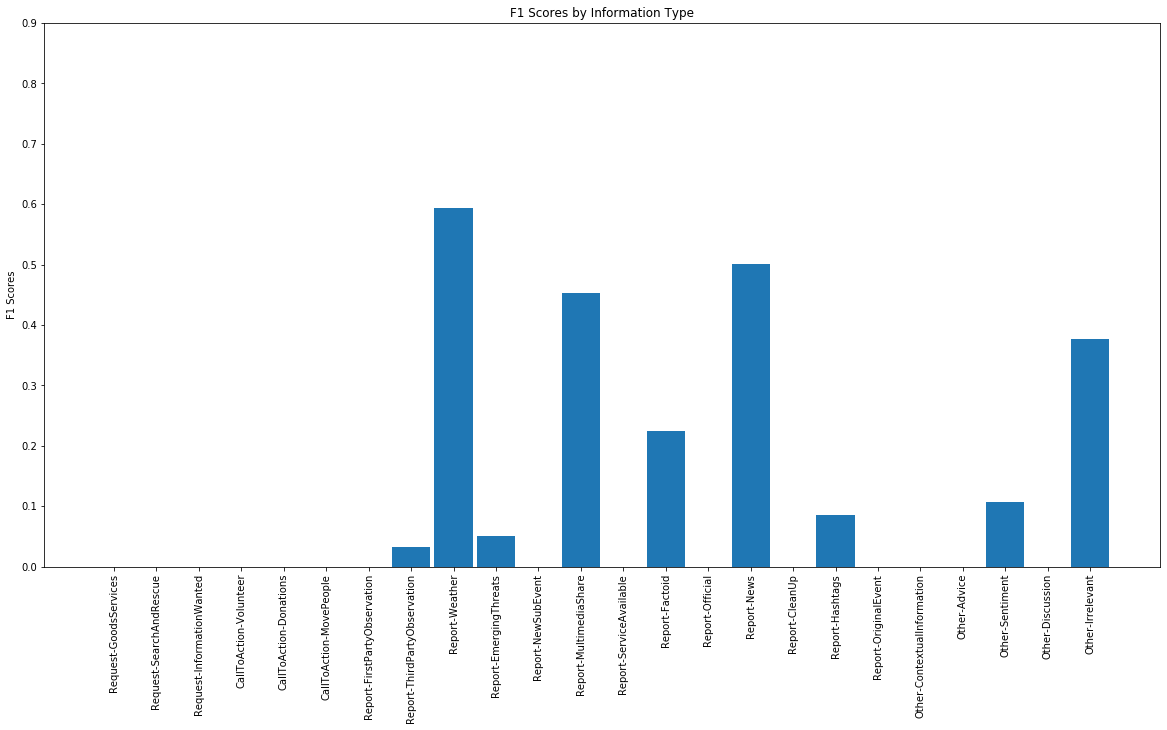

In [120]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Type Categorization
# Per Information Type F1 Graph
# --------------------------------------------------
# Per Category Classification Performance
# F1 scores for each information type, graphed
# Does not average across events (larger events have more impact)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

N = len(informationTypes2Index)
ind = np.arange(N)

scoresPerCategoryF1 = []
categoryLabels = []
for categoryId in informationTypes2Index.keys():
    localF1Score = f1_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    print(categoryId, localF1Score)
    scoresPerCategoryF1.append(localF1Score)
    categoryLabels.append(categoryId)
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, scoresPerCategoryF1, width)

plt.ylabel('F1 Scores')
plt.title('F1 Scores by Information Type')
plt.xticks(ind, categoryLabels, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [121]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Type Categorization
# Per Event Performance
# --------------------------------------------------
# Categorization performance for each event
# Precision, recall and F1 only consider the positive class
# Accuracy is an overall metric
# We report performance for all categories, high importance categories and low importance categories
# Macro average (categories have equal weight)

perEventFile.write("--------------------------------------------------"+"\n")
perEventFile.write("EVALUATON: Information Type Categorization (Multi-type)"+"\n")
perEventFile.write("Per Event Performance"+"\n")
perEventFile.write("--------------------------------------------------"+"\n")

for eventId in eventIdentifiers:
    tavgPrecision = 0.0
    tavgRecall = 0.0
    tavgF1 = 0.0
    tavgAccuracy = 0.0

    categoryCount = 0
    
    for categoryId in informationTypes2Index.keys():
        if sum(event2groundtruth[eventId].get(categoryId)) == 0:
            continue
        
        categoryPrecision = precision_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryRecall = recall_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryF1 = f1_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryAccuracy = accuracy_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId))
        
        tavgPrecision = tavgPrecision + categoryPrecision
        tavgRecall = tavgRecall + categoryRecall
        tavgF1 = tavgF1 + categoryF1
        tavgAccuracy = tavgAccuracy + categoryAccuracy
        
        categoryCount += 1
    
    if categoryCount == 0:
        print("No categories for event:", eventId)
        continue
    
    print(eventId)
    print("  Information Type Precision (positive class, multi-type, macro): "+str(tavgPrecision/categoryCount))
    print("  Information Type Recall (positive class, multi-type, macro): "+str(tavgRecall/categoryCount))
    print("  Information Type F1 (positive class, multi-type, macro): "+str(tavgF1/categoryCount))
    print("  Information Type Accuracy (overall, multi-type, macro): "+str(tavgAccuracy/categoryCount))
    print("")
    
    perEventFile.write(eventId+"\n")
    perEventFile.write("  Information Type Precision (positive class, multi-type, macro): "+str(tavgPrecision/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type Recall (positive class, multi-type, macro): "+str(tavgRecall/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type F1 (positive class, multi-type, macro): "+str(tavgF1/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type Accuracy (overall, multi-type, macro): "+str(tavgAccuracy/len(informationTypes2Index))+"\n")
    perEventFile.write("\n")
    
perEventFile.write("\n")

TRECIS-CTIT-H-060
  Information Type Precision (positive class, multi-type, macro): 1.0
  Information Type Recall (positive class, multi-type, macro): 0.04152823920265781
  Information Type F1 (positive class, multi-type, macro): 0.07974481658692184
  Information Type Accuracy (overall, multi-type, macro): 0.04152823920265781

TRECIS-CTIT-H-061
  Information Type Precision (positive class, multi-type, macro): 0.22573004494248813
  Information Type Recall (positive class, multi-type, macro): 0.1600301323519552
  Information Type F1 (positive class, multi-type, macro): 0.15399206523799294
  Information Type Accuracy (overall, multi-type, macro): 0.8559122944400938

TRECIS-CTIT-H-062
  Information Type Precision (positive class, multi-type, macro): 0.2580655890286648
  Information Type Recall (positive class, multi-type, macro): 0.22797045603737373
  Information Type F1 (positive class, multi-type, macro): 0.20131128172931081
  Information Type Accuracy (overall, multi-type, macro): 0.797

1

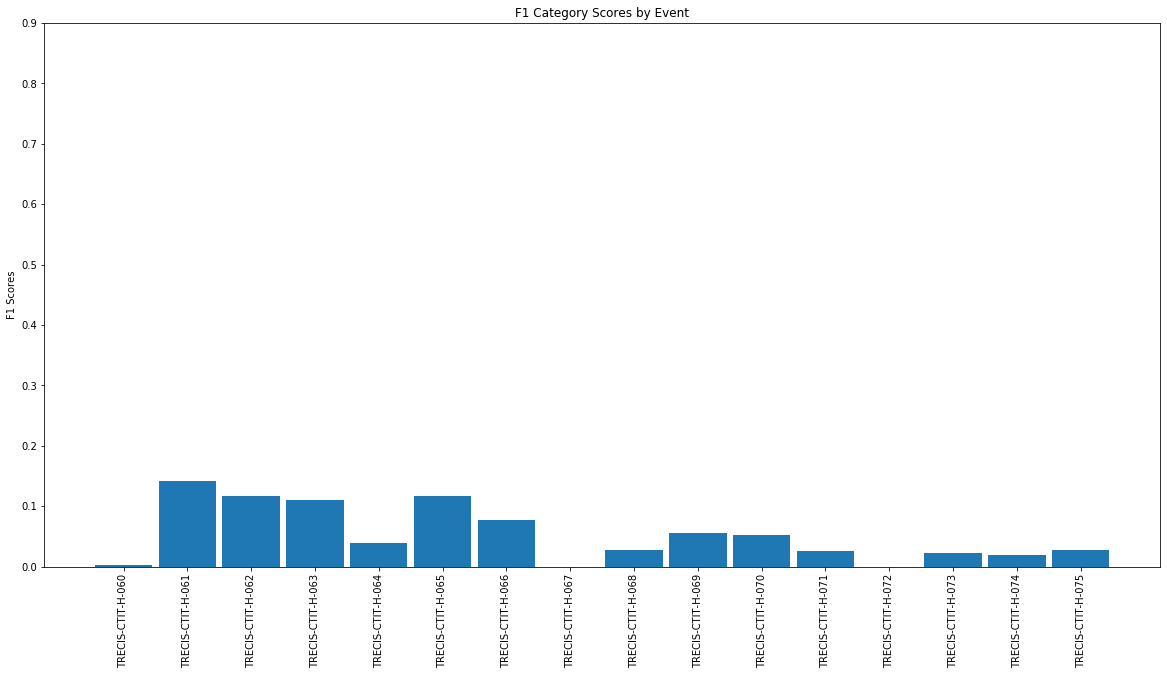

In [122]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Type Categorization
# Per Event F1 Graph
# --------------------------------------------------
# Multi-type (1 vs All): Tweets have multiple information types, aim: predict all of them
# Macro average (categories have equal weight)

N = len(eventIdentifiers)
ind = np.arange(N)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

scoresPerEventF1 = []
for eventId in eventIdentifiers:
    avgF1_ = 0.0
    
    for categoryId in informationTypes2Index.keys():
        avgF1_ = avgF1_ + f1_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        
    scoresPerEventF1.append(avgF1_/len(informationTypes2Index))
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, scoresPerEventF1, width)

plt.ylabel('F1 Scores')
plt.title('F1 Category Scores by Event')
plt.xticks(ind, eventIdentifiers, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [123]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Priority Level
# Overall Performance
# --------------------------------------------------
# How divergent is the system from the human priority labels?
# F1 performance over information types, higher is better
# Macro average (categories have equal weight)

from sklearn.metrics import mean_squared_error

priorityAvgf1 = 0.0;
priorityAvgf1High = 0.0;
priorityAvgf1Low = 0.0;
for categoryId in informationTypes2Index.keys():
    groundTruthPriorities = category2GroundTruthPriority[categoryId]
    predictedPriorities = category2PredictedPriority[categoryId]

    f1 = f1_score(groundTruthPriorities, predictedPriorities, average='macro')
    priorityAvgf1 = priorityAvgf1 + f1;
    
    if any(categoryId in s for s in highImportCategories):
        priorityAvgf1High = priorityAvgf1High + f1
    else:
        priorityAvgf1Low = priorityAvgf1Low + f1
    
    
    
print("Priority Label Prediction (F1, macro): "+str(priorityAvgf1/len(informationTypes2Index)))
    
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: Information Priority Level"+"\n")
resultsFile.write("Overall Performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> Priority Label Prediction (F1, macro): "+str(priorityAvgf1/len(informationTypes2Index))+"\n")
resultsFile.write("\n")

Priority Label Prediction (F1, macro): 0.276383780475964


1

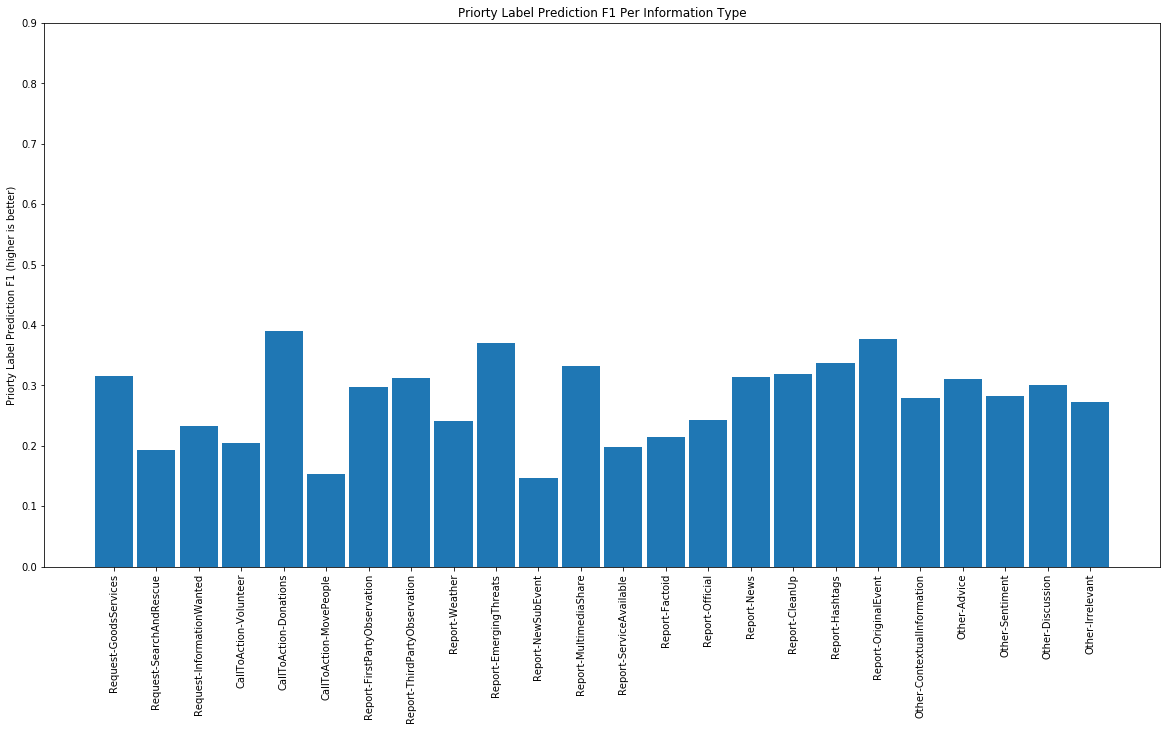

In [124]:
# --------------------------------------------------
# TREC-IS 2020-A
# Task 1
# Information Priority Level
# Per Information Type Performance
# --------------------------------------------------
# F1 per information type (macro averaged), higher is better
# Macro average (categories have equal weight)

N = len(informationTypes2Index)
ind = np.arange(N)

priorityCatF1Values = []
categoryLabels = []
for categoryId in informationTypes2Index.keys():
    groundTruthPriorities = category2GroundTruthPriority[categoryId]
    predictedPriorities = category2PredictedPriority[categoryId]
    priorityCatF1 = f1_score(groundTruthPriorities, predictedPriorities, average='macro')
    if (math.isnan(priorityCatF1)):
        priorityCatF1 = 0.0
    categoryLabels.append(categoryId)
    priorityCatF1Values.append(priorityCatF1);
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, priorityCatF1Values, width)

plt.ylabel('Priorty Label Prediction F1 (higher is better)')
plt.title('Priorty Label Prediction F1 Per Information Type')
plt.xticks(ind, categoryLabels, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [125]:
resultLine = None

if taskno == "2":
    # Print the evaluation table row in latex
    print("Run & NDCG & CF1-A & CAcc & PErr-A \\\\")

    resultLine = (str.format('{0:.4f}', system_ndcg_micro)+
         " & "+
         str.format('{0:.4f}',avgF1/numInformationTypes)+
         " & "+
         str.format('{0:.4f}',avgAccuracy/numInformationTypes)+
         " & "+
         str.format('{0:.4f}',priorityAvgf1/len(informationTypes2Index))+
         " \\\\")

else:

    # Print the evaluation table row in latex
    print("Run & NDCG & CF1-H & CF1-A & CAcc & PErr-H & PErr-A \\\\")

    resultLine = (str.format('{0:.4f}', system_ndcg_micro)+
         " & "+
         str.format('{0:.4f}',avgF1High/numHighInformationTypes)+
         " & "+
         str.format('{0:.4f}',avgF1/numInformationTypes)+
         " & "+
         str.format('{0:.4f}',avgAccuracy/numInformationTypes)+
         " & "+
         str.format('{0:.4f}',priorityAvgf1High/numHighInformationTypes)+
         " & "+
         str.format('{0:.4f}',priorityAvgf1/len(informationTypes2Index))+
         " \\\\")

print(runName+" & "+resultLine)

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("LATEX"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write(runName+" & "+resultLine + "\n")

Run & NDCG & CF1-H & CF1-A & CAcc & PErr-H & PErr-A \\
Test & 0.4698 & 0.0085 & 0.1009 & 0.8844 & 0.2294 & 0.2764 \\


62

In [126]:
# Done
resultsFile.close() 
perTopicFile.close()
perEventFile.close()